In [1]:
from pandas_datareader import data
import yfinance as yf
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [81]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
DF = yf.download(tickers, start, end)
DF

[*********************100%***********************]  6 of 6 completed


Adj Close                                                \
                  BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  32.695656  346.774353   99.715477  25.132870  33.995918   
2006-01-04  32.348427  340.372009   98.338188  24.987818  34.019241   
2006-01-05  32.390099  342.060516   98.299484  25.063494  34.112537   
2006-01-06  32.341488  342.060516   99.692261  25.240097  34.147514   
2006-01-09  32.362312  340.442413  100.891594  25.650034  34.508980   
...               ...         ...         ...        ...        ...   
2015-12-24  14.791987   43.010418  157.999832  53.523319  26.389025   
2015-12-28  14.672071   42.741150  157.263763  53.346535  26.137159   
2015-12-29  14.800554   43.230732  158.917664  53.901051  26.445902   
2015-12-30  14.603554   42.675873  157.601486  53.515285  26.185909   
2015-12-31  14.415119   42.227070  156.060211  53.065254  25.844669   

                           Close                                     ...  \
                  WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  19.542271  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  19.315603  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  19.294167  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  19.407494  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  19.404430  46.599998  483.899994  130.389999  40.669998  ...   
...               ...        ...         ...         ...        ...  ...   
2015-12-24  43.737068  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28  43.625366  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29  44.112049  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30  43.792919  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31  43.370060  16.830000   51.750000  180.229996  66.029999  ...   

                  Open                                     Volume            \
                    GS        JPM         MS        WFC       BAC         C   
Date                                                                          
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700   1537600   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900   1870960   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700   1143160   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800   1370210   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400   1680740   
...                ...        ...        ...        ...       ...       ...   
2015-12-24  182.270004  66.620003  32.570000  54.970001  29369400   4671200   
2015-12-28  181.770004  66.290001  32.360001  54.549999  41777500   8761700   
2015-12-29  182.820007  66.839996  32.439999  55.110001  45670400  10155100   
2015-12-30  183.279999  67.040001  32.500000  55.270000  35066400   8763300   
2015-12-31  181.160004  66.190002  31.910000  54.509998  47153000  11281800   

                                                  
                 GS       JPM       MS       WFC  
Date                                              
2006-01-03  6188700  12838600  5377000  11016400  
2006-01-04  4861600  13491500  7977800  10870000  
2006-01-05  3717400   8109400  5778000  10158000  
2006-01-06  4319600   7966900  6889800   8403800  
2006-01-09  4723500  16575200  4144500   5619600  
...             ...       ...      ...       ...  
2015-12-24  1107600   4468200  2798200   4999400  
2015-12-28  1723300   6610600  5420300   8288800  
2015-12-29  1848900   9820800  6388200   7894900  
2015-12-30  1514300   7190700  5057200   8016900  
2015-12-31  1773900  14654300  8154300  10929800  

[2517 rows x 36 columns]

In [88]:
# Inspect the first rows of November-December 2006
print(DF.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

            Adj Close                                                \
                  BAC           C          GS        JPM         MS   
Date                                                                  
2006-11-01  38.421700  363.518433  144.336853  30.299376  43.730354   
2006-11-02  38.400188  364.544464  146.201523  30.280020  43.961548   
2006-11-03  38.314133  363.445129  145.998642  30.273548  44.032703   
2006-11-06  38.873463  368.062408  148.237885  30.764240  45.076004   
2006-11-07  39.024040  369.967926  147.208008  30.660929  44.993023   

                           Close                                     ...  \
                  WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-11-01  22.754726  53.580002  500.899994  185.000000  46.930000  ...   
2006-11-02  22.678854  53.549999  497.399994  187.389999  46.900002  ...   
2006-11-03  22.761061  53.430000  495.899994  187.1

In [85]:
print(DF.index)
print(DF.columns)
ts = DF['Close'][-10:]
type(ts)

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)
MultiIndex([('Adj Close', 'BAC'),
            ('Adj Close',   'C'),
            ('Adj Close',  'GS'),
            ('Adj Close', 'JPM'),
            ('Adj Close',  'MS'),
            ('Adj Close', 'WFC'),
            (    'Close', 'BAC'),
            (    'Close',   'C'),
            (    'Close',  'GS'),
            (    'Close', 'JPM'),
            (    'Close',  'MS'),
            (    'Close', 'WFC'),
            (     'High', 'BAC'),
            (     'High',   'C'),
            (     'High',  'GS'),
            (     'High',

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2015-12-17,17.299999,52.840000,182.610001,66.279999,32.380001,55.470001
2015-12-18,16.760000,51.209999,175.490005,64.400002,31.290001,53.790001
2015-12-21,16.969999,51.790001,177.750000,65.540001,31.680000,54.020000
2015-12-22,17.080000,52.009998,180.050003,65.680000,32.220001,54.340000
2015-12-23,17.340000,52.630001,182.949997,66.730003,32.599998,55.040001
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001
2015-12-30,17.049999,52.299999,182.009995,66.589996,32.230000,54.889999


In [4]:
import seaborn as sns

In [5]:
DF['Close'].max().round(2)

BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

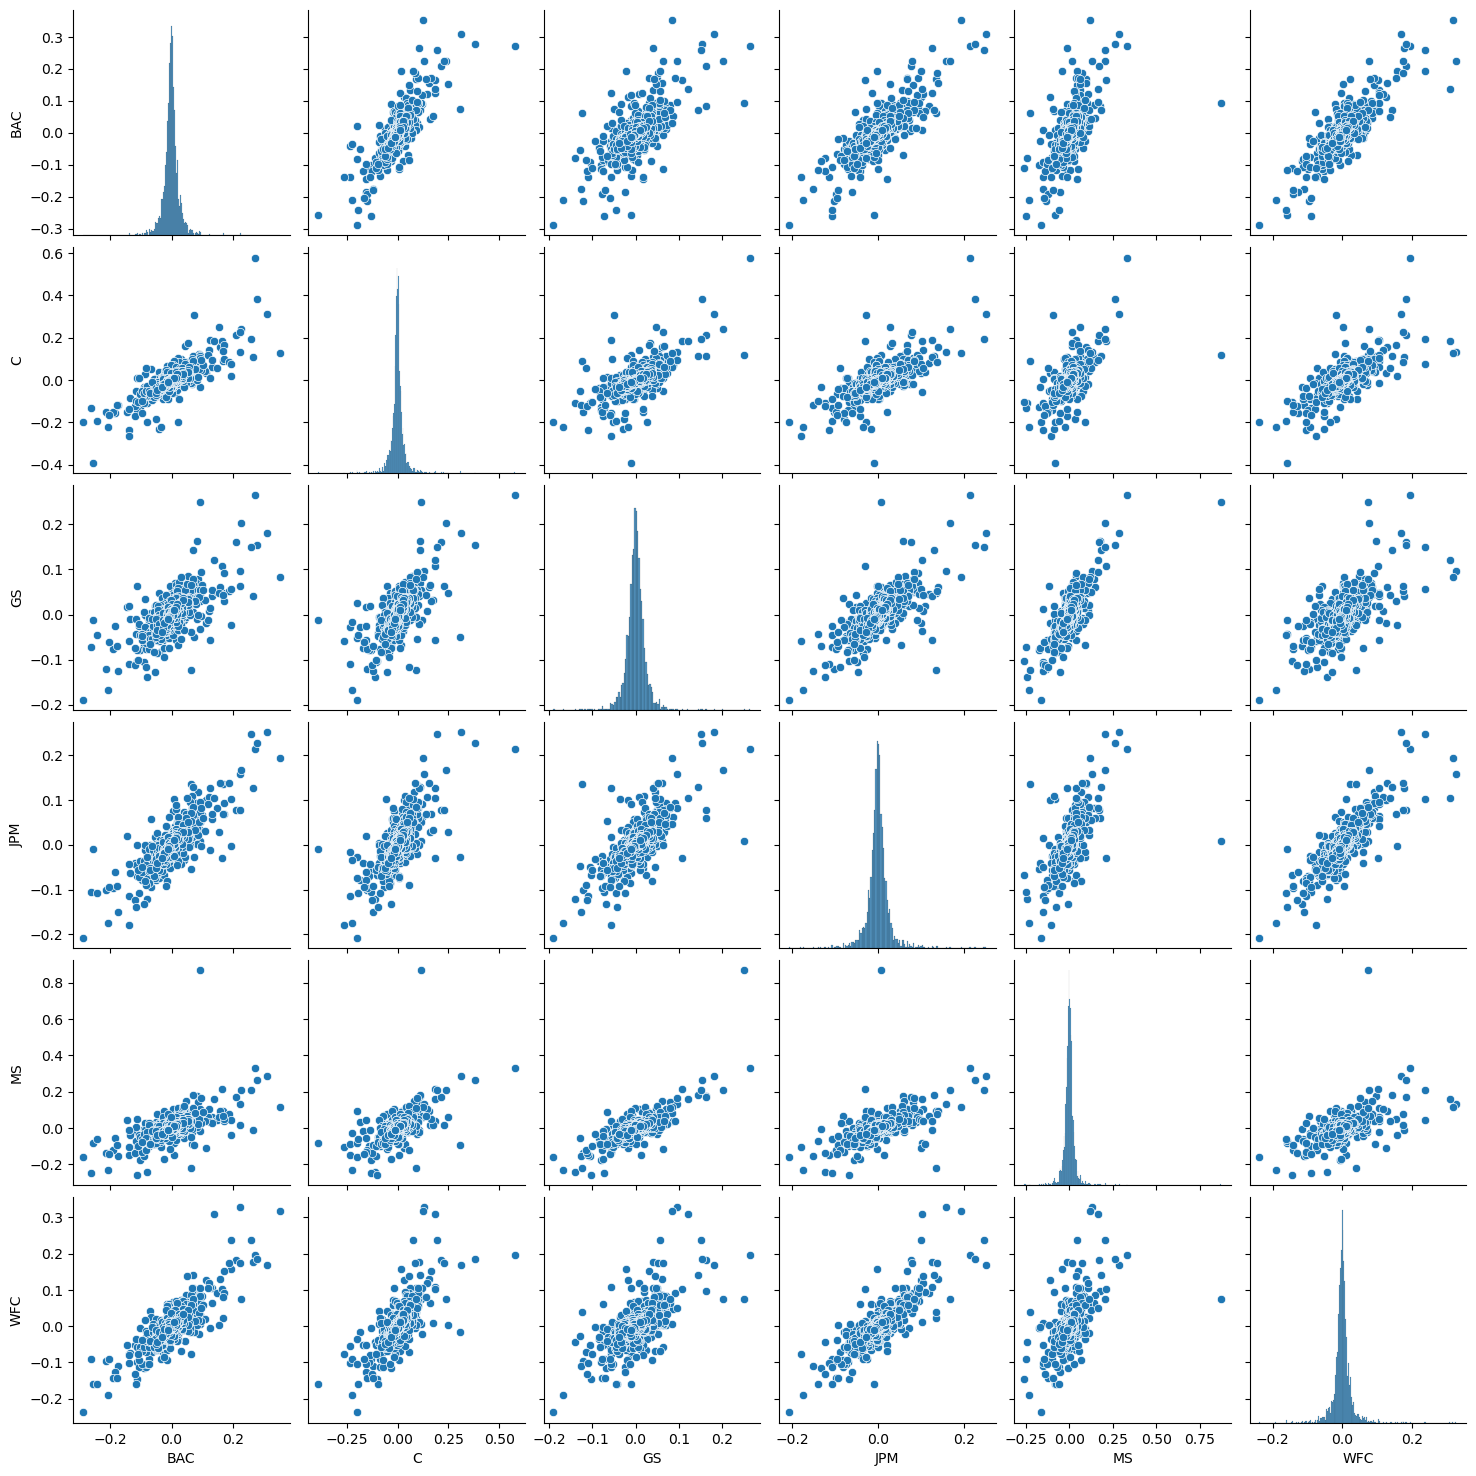

In [7]:
import seaborn as sns
sns.pairplot(returns[1:])

In [8]:
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [9]:
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [10]:
min_max = pd.DataFrame()
min_max['MIN'] = returns.idxmin()
min_max['MAX'] = returns.idxmax()
min_max['STD'] = returns.std()
min_max

,MIN,MAX,STD
BAC,2009-01-20,2009-04-09,0.036647
C,2009-02-27,2008-11-24,0.038672
GS,2009-01-20,2008-11-24,0.025390
JPM,2009-01-20,2009-01-21,0.027667
MS,2008-10-09,2008-10-13,0.037819
WFC,2009-01-20,2008-07-16,0.030238


C:\Users\User\AppData\Local\Temp\ipykernel_17504\1505154029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31', 'MS'], color='green', bins=100)


<Axes: xlabel='MS', ylabel='Density'>

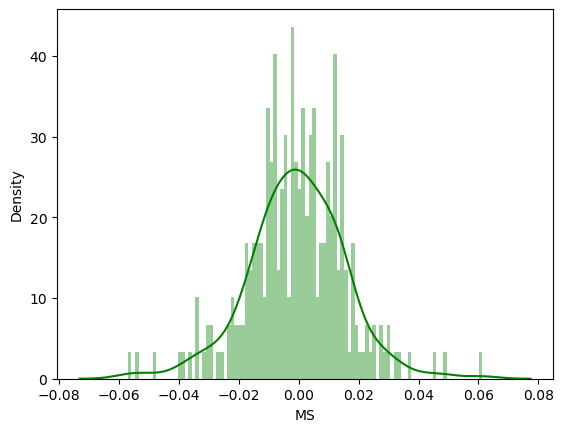

In [11]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31', 'MS'], color='green', bins=100)


C:\Users\User\AppData\Local\Temp\ipykernel_17504\2545529058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-13']['C'], color='red', bins=100)


<Axes: xlabel='C', ylabel='Density'>

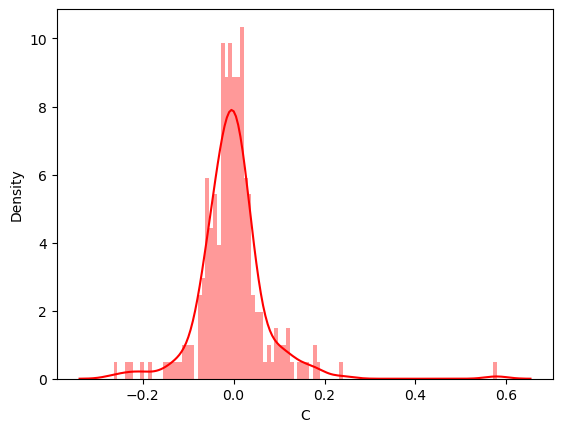

In [12]:
sns.distplot(returns.loc['2008-01-01':'2008-12-13']['C'], color='red', bins=100)

In [78]:
DF['Close'].columns[0]

'BAC'

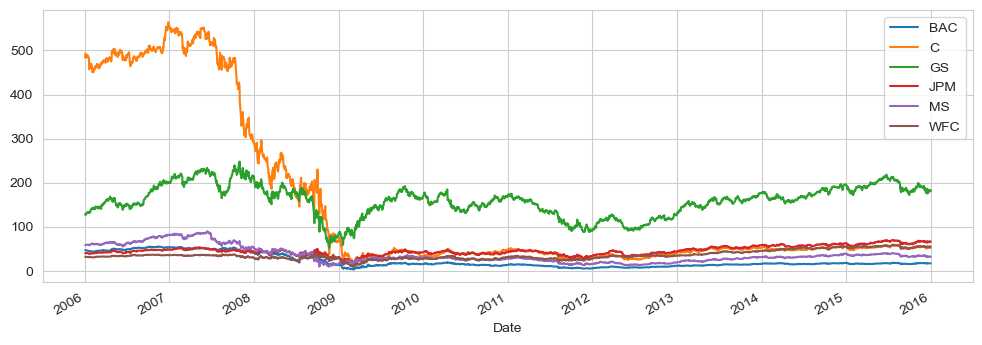

In [38]:
# for tick in tickers:
DF['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

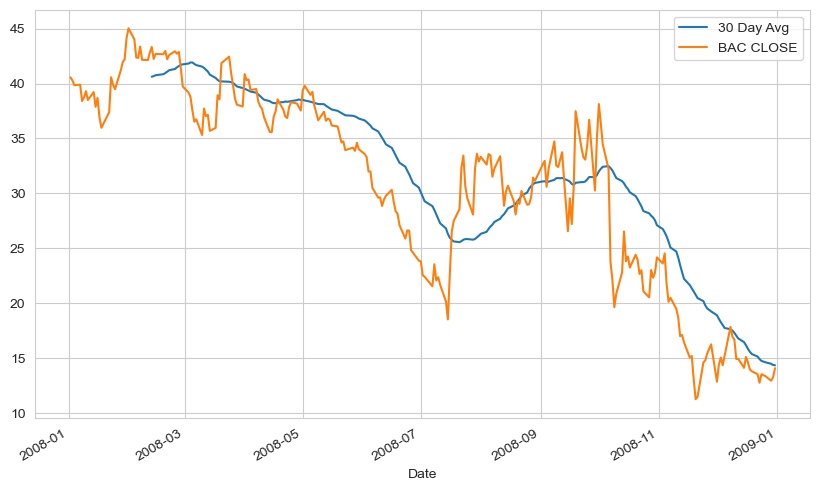

In [47]:
plt.figure(figsize=(10,6))
DF['Close']['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
DF['Close']['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend(loc='upper right')

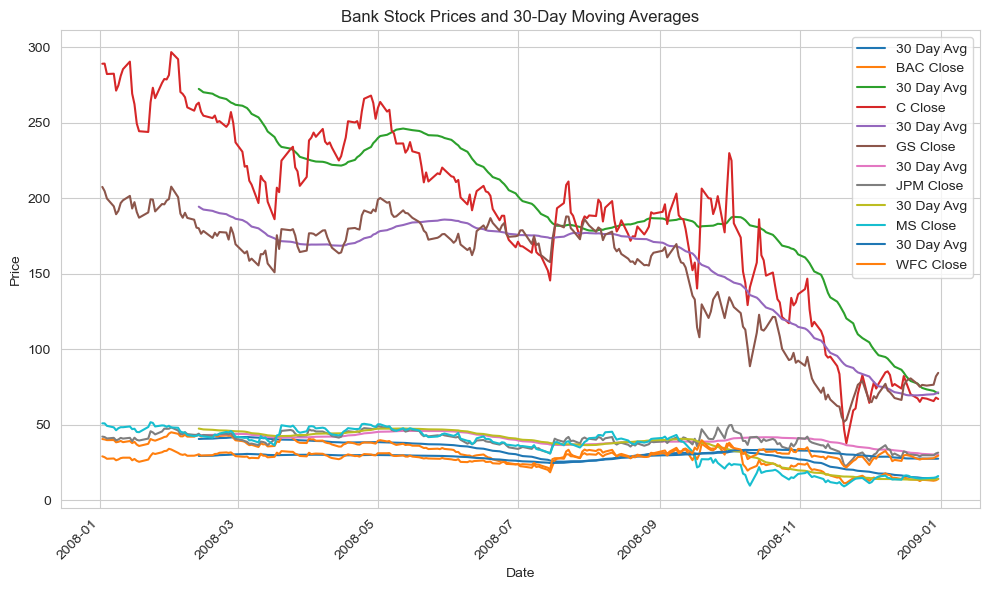

In [80]:
plt.figure(figsize=(10, 6))
for ticker in tickers:
    DF['Close'][f'{ticker}'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
    DF['Close'][ticker].loc['2008-01-01':'2009-01-01'].plot(label= f'{ticker} Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bank Stock Prices and 30-Day Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()